In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v12.csv')
df.describe()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
count,56700.000000,56700.000000,4.266600e+04,4.266600e+04,56700.000000,56700.000000,5.670000e+04
mean,0.500000,0.700000,6.903100e+06,4.366087e+06,0.184606,0.266243,2.004257e+06
std,0.302768,0.129101,8.143602e+06,5.306299e+06,0.064276,0.133079,1.118936e+05
min,0.000000,0.500000,8.855692e+05,6.184599e+05,0.000345,0.044286,1.490691e+06
25%,0.250000,0.600000,2.774893e+06,1.740025e+06,0.148035,0.155936,1.936076e+06
50%,0.500000,0.700000,4.288688e+06,2.695656e+06,0.180300,0.255421,2.000394e+06
75%,0.750000,0.800000,7.804394e+06,4.930208e+06,0.241778,0.362919,2.068945e+06
max,1.000000,0.900000,1.455432e+08,1.067806e+08,0.301018,0.717458,2.357444e+06


In [3]:
df.corr()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
correlation,1.000000e+00,-1.124640e-17,0.008170,0.089344,-4.976825e-01,9.460362e-01,-4.491748e-02
load,-1.124640e-17,1.000000e+00,0.629875,0.611129,2.322824e-19,5.199953e-19,-2.629499e-18
v1,8.170004e-03,6.298755e-01,1.000000,0.990567,-1.155133e-01,-2.033959e-03,3.028199e-01
v2,8.934368e-02,6.111292e-01,0.990567,1.000000,-1.638432e-01,8.591427e-02,2.979602e-01
disturbance,-4.976825e-01,2.322824e-19,-0.115513,-0.163843,1.000000e+00,-4.440599e-01,-3.885344e-02
mean_ca,9.460362e-01,5.199953e-19,-0.002034,0.085914,-4.440599e-01,1.000000e+00,-7.899961e-02
actual_load,-4.491748e-02,-2.629499e-18,0.302820,0.297960,-3.885344e-02,-7.899961e-02,1.000000e+00


In [4]:
df = df.drop('v1', axis=1)

In [5]:
vals = df.drop(['disturbance', 'actual_load', 'mean_ca'], axis=1).groupby(['algorithm', 'correlation', 'load']).median()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load            v2                            
algorithm                              BF            RR          SALP
0                 0.0  0.50  1.080290e+06  1.383331e+06  1.054764e+06
1                 0.0  0.55  1.321052e+06  1.832948e+06  1.290168e+06
2                 0.0  0.60  1.622364e+06  2.473015e+06  1.585021e+06
3                 0.0  0.65  2.010353e+06  3.460358e+06  1.965173e+06
4                 0.0  0.70  2.528704e+06  4.341583e+06  2.474060e+06

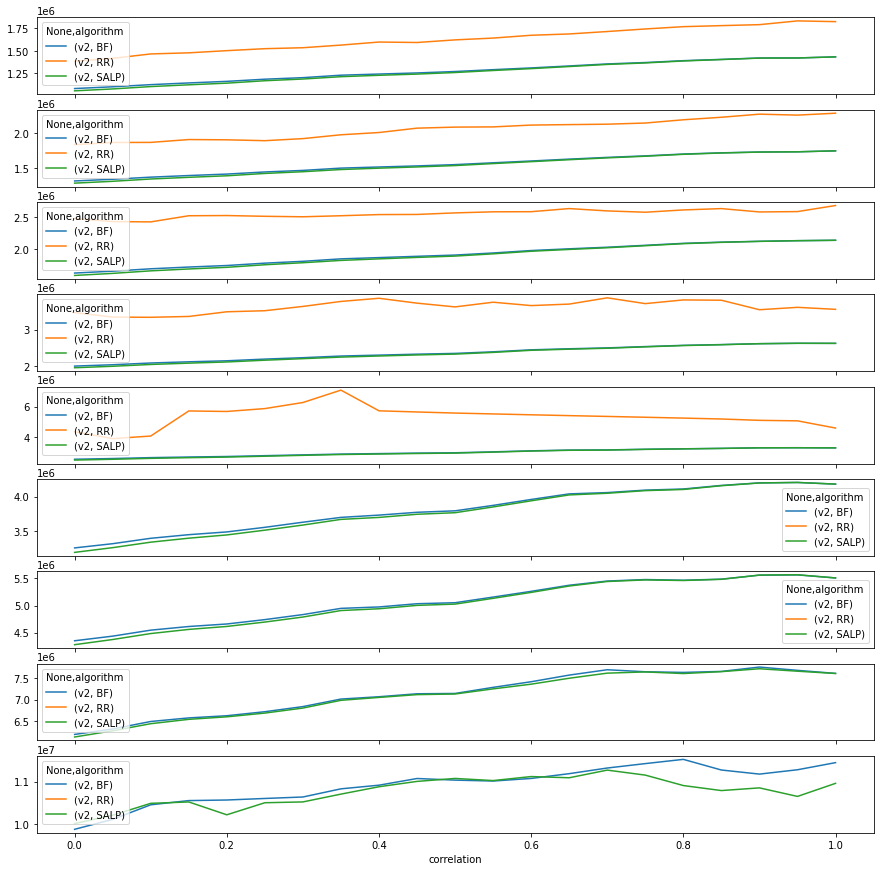

In [6]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

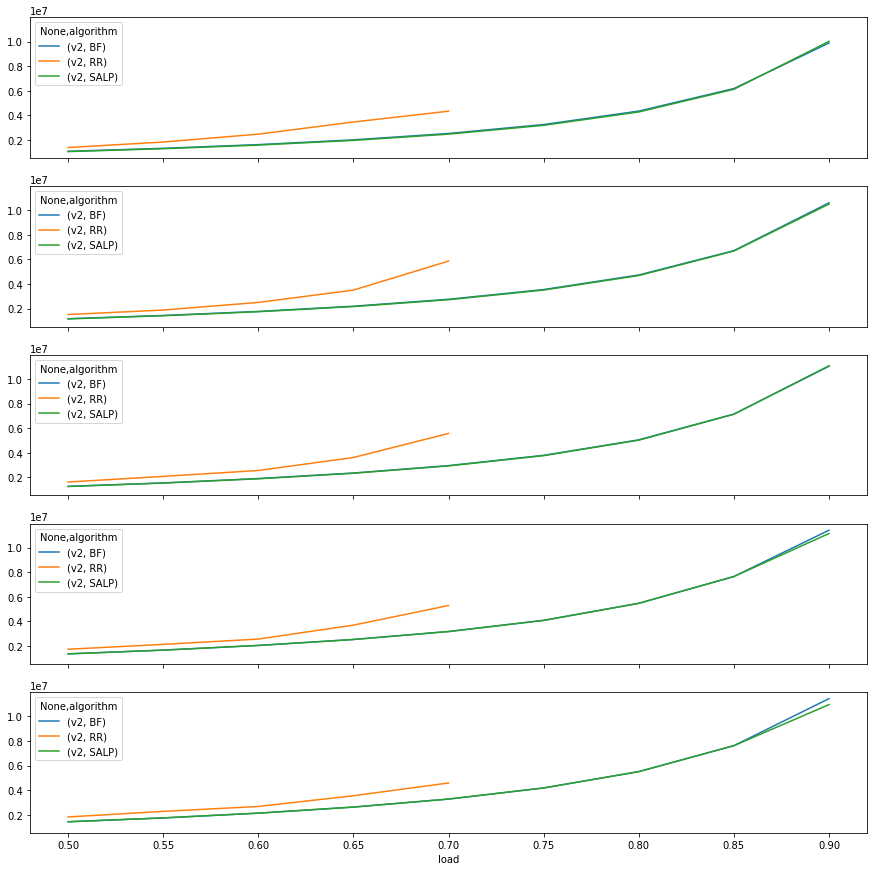

In [7]:
cors = np.array([0,.25,.5,.75,1])
fig, axes = plt.subplots(cors.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

In [8]:
df.groupby(['algorithm', 'load']).count()

correlation    v2  disturbance  mean_ca  actual_load
algorithm load                                                      
BF        0.50         2100  2100         2100     2100         2100
          0.55         2100  2100         2100     2100         2100
          0.60         2100  2100         2100     2100         2100
          0.65         2100  2100         2100     2100         2100
          0.70         2100  2100         2100     2100         2100
          0.75         2100  2100         2100     2100         2100
          0.80         2100  2100         2100     2100         2100
          0.85         2100  2094         2100     2100         2100
          0.90         2100  1974         2100     2100         2100
RR        0.50         2100  2036         2100     2100         2100
          0.55         2100  1657         2100     2100         2100
          0.60         2100  1010         2100     2100         2100
          0.65         2100   461         2100     2100         2100
          0.70         2100    54         2100     2100         2100
          0.75         2100     0         2100     2100         2100
          0.80         2100     0         2100     2100         2100
          0.85         2100     0         2100     2100         2100
          0.90         2100     0         2100     2100         2100
SALP      0.50         2100  2100         2100     2100         2100
          0.55         2100  2100         2100     2100         2100
          0.60         2100  2100         2100     2100         2100
          0.65         2100  2100         2100     2100         2100
          0.70         2100  2100         2100     2100         2100
          0.75         2100  2100         2100     2100         2100
          0.80         2100  2100         2100     2100         2100
          0.85         2100  2077         2100     2100         2100
          0.90         2100  1903         2100     2100         2100

In [9]:
dist = df.drop(['v2', 'actual_load', 'mean_ca', 'load'], axis=1)
dist = dist.drop_duplicates()
dist = dist.groupby(['algorithm', 'correlation']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist.head()

correlation disturbance                    
algorithm                      BF        RR      SALP
0                0.00    0.206603  0.273351  0.172379
1                0.05    0.205541  0.273351  0.170247
2                0.10    0.204339  0.273033  0.168341
3                0.15    0.202774  0.272500  0.166198
4                0.20    0.200870  0.271783  0.163790

<AxesSubplot:xlabel='correlation'>

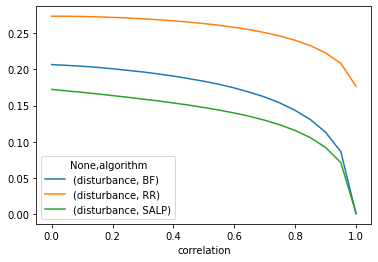

In [10]:
# loads = vals['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
# plt.show()
dist.plot(x='correlation', legend=True)

In [11]:
acld = df.drop(['algorithm', 'v2', 'disturbance', 'mean_ca', 'load'], axis=1).groupby(['correlation']).mean()
acld = acld.drop_duplicates()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,actual_load
0,0.00,2.002710e+06
1,0.05,2.002704e+06
2,0.10,2.004965e+06
3,0.15,2.007052e+06
4,0.20,2.008791e+06


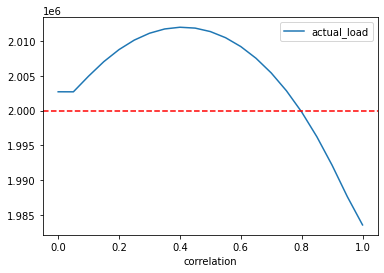

In [16]:
est = 2.0 * 10**6
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
#     axes[i].axhline(est,color='red',ls='--')
# plt.show()
fig, ax = plt.subplots()
acld.plot(x='correlation', ax=ax, legend=True)
ax.axhline(est,color='red',ls='--')
plt.show()

In [13]:
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
#     axes[i][0].axhline(est,color='red',ls='--', label="estimated")
#     vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

# plt.show()

In [14]:
mca = df.drop(['v2', 'actual_load', 'disturbance', 'load'], axis=1)
mca = mca.drop_duplicates()
mca = mca.groupby(['algorithm', 'correlation']).mean()
mca = mca.unstack(0)
mca.reset_index(inplace=True)
mca.head()

correlation   mean_ca                    
algorithm                    BF        RR      SALP
0                0.00  0.074066  0.070529  0.047088
1                0.05  0.094228  0.090966  0.068818
2                0.10  0.113661  0.110548  0.089924
3                0.15  0.132644  0.129730  0.110553
4                0.20  0.151394  0.148674  0.130857

<AxesSubplot:xlabel='correlation'>

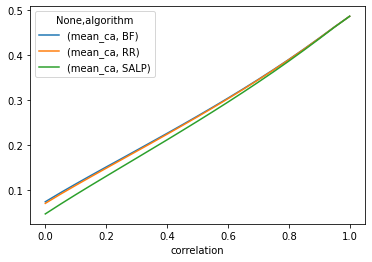

In [15]:
mca.plot(x='correlation', legend=True)